# Machine Learning Project -1   (Linear Regression)

#### Problem Statement : 

One of the largest retail chains in the world wants to use their vast data source to build an efficient forecasting model to predict the sales for each SKU in its portfolio at its 76 different stores using historical sales data for the past 3 years on a week-on-week basis. Sales and promotional information is also available for each week - product and store wise. 

However, no other information regarding stores and products are available. So we need to forecast accurately the sales values for every such product/SKU-store combination for the next 12 weeks accurately.

In [4]:
#importing necessary packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
%matplotlib inline 
 
import datetime as dt 
from datetime import timedelta 

import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error as MSLE

In [5]:
#loading train and test dataset
train = pd.read_csv("/content/train_0irEZ2H.csv")
test = pd.read_csv('/content/test_nfaJ3J5.csv')

## train data

In [6]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   record_ID        150150 non-null  int64  
 1   week             150150 non-null  object 
 2   store_id         150150 non-null  int64  
 3   sku_id           150150 non-null  int64  
 4   total_price      150149 non-null  float64
 5   base_price       150150 non-null  float64
 6   is_featured_sku  150150 non-null  int64  
 7   is_display_sku   150150 non-null  int64  
 8   units_sold       150150 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 10.3+ MB


#### Checking Missing Values

In [8]:
train.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

#### Typecasting

In [9]:
# changing the data type of week into datetime64
train['week'] = train['week'].astype('datetime64')

In [10]:
# changing the data type of some variables into category
train['store_id'] = train['store_id'].astype('category')
train['sku_id'] = train['sku_id'].astype('category')
train['is_featured_sku'] = train['is_featured_sku'].astype('category')
train['is_display_sku'] = train['is_display_sku'].astype('category')

In [11]:
# creating new variables from the column week 
train['month'] = [date.month for date in train.week] 
train['day'] = [date.day for date in train.week]
train['year'] = [date.year for date in train.week]  
train['week_of_year'] = [date.weekofyear for date in train.week] 
train['day_of_week'] = [date.dayofweek for date in train.week]

In [12]:
# dropping variable week
train = train.drop(['week'] ,axis = 1)

In [13]:
# droping variable record ID
train = train.drop(['record_ID'] ,axis = 1)

In [14]:
train.dtypes

store_id           category
sku_id             category
total_price         float64
base_price          float64
is_featured_sku    category
is_display_sku     category
units_sold            int64
month                 int64
day                   int64
year                  int64
week_of_year          int64
day_of_week           int64
dtype: object

## test data

In [15]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   record_ID        13860 non-null  int64  
 1   week             13860 non-null  object 
 2   store_id         13860 non-null  int64  
 3   sku_id           13860 non-null  int64  
 4   total_price      13860 non-null  float64
 5   base_price       13860 non-null  float64
 6   is_featured_sku  13860 non-null  int64  
 7   is_display_sku   13860 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 866.4+ KB


#### Checking Missing Values

In [17]:
test.isna().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
dtype: int64

#### Typecasting

In [18]:
# changing the data type of week into datetime64
test['week'] = test['week'].astype('datetime64')

In [19]:
# creating new variables from the column week 
test['month'] = [date.month for date in test.week] 
test['day'] = [date.day for date in test.week]
test['year'] = [date.year for date in test.week]  
test['week_of_year'] = [date.weekofyear for date in test.week] 
test['day_of_week'] = [date.dayofweek for date in test.week] 

In [20]:
# dropping variable week
test = test.drop(['week'] ,axis = 1)

In [21]:
# droping variable record ID
test = test.drop(['record_ID'] ,axis = 1)

In [22]:
test.dtypes

store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
month                int64
day                  int64
year                 int64
week_of_year         int64
day_of_week          int64
dtype: object

## Exploratory Data Analysis

#### Numerical Variables

In [23]:
# creating a variable which consists of only numerical variables
numerical = train.select_dtypes(include = ['int64','float64'])

In [24]:
# checking the range of each numerical variable in the dataset
for i in numerical.columns:
    print(f'range of {i}:[{train[i].min()}, {train[i].max()}]')

range of total_price:[41.325, 562.1625]
range of base_price:[61.275, 562.1625]
range of units_sold:[1, 2876]
range of month:[1, 12]
range of day:[1, 31]
range of year:[2011, 2013]
range of week_of_year:[1, 52]
range of day_of_week:[0, 6]


In [25]:
# defining a function to have a look at the line plots of each numerical variables
def UVA_KDE(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  for j,i in enumerate(var_group):
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format(round(kurt,2),round(skew,2),
                                                                                     round(ran,2),
                                                                                     round(mean,2),
                                                                                     round(median,2)))

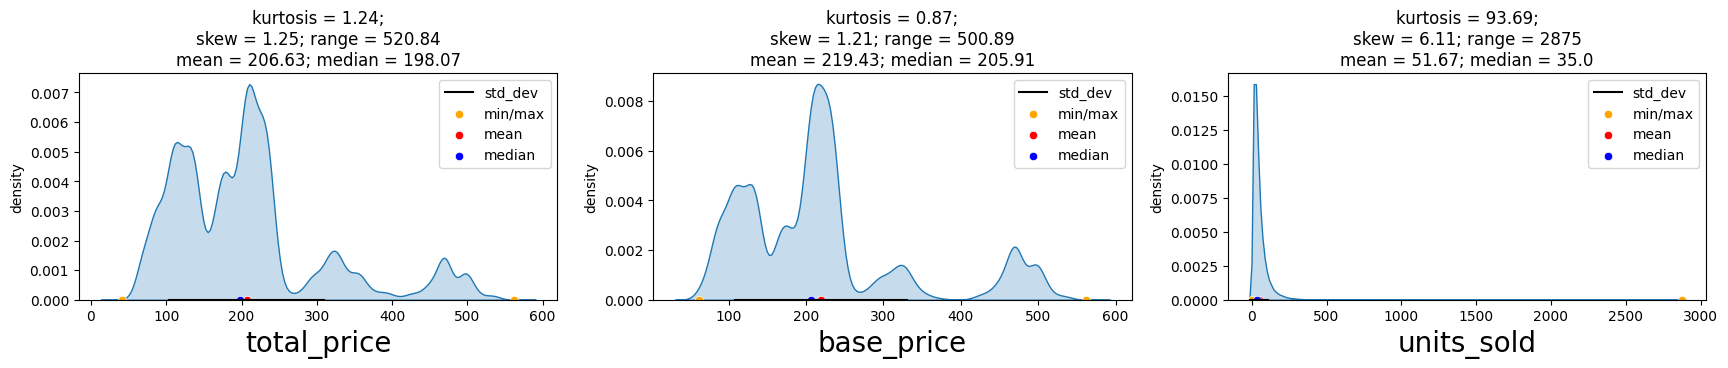

In [26]:
UVA_KDE(train,['total_price','base_price','units_sold'])

In [27]:
# defining a function to have a look at the box plots of each numerical variables
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

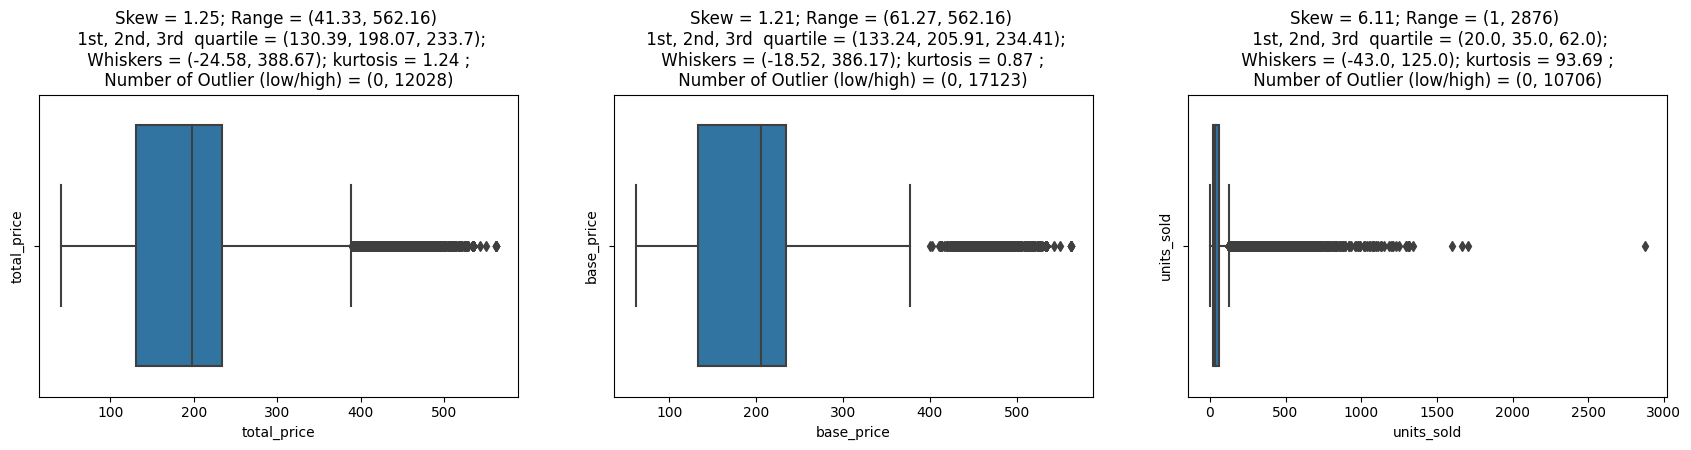

In [28]:
UVA_boxplot(train,['total_price', 'base_price','units_sold'])

#### Categorical Variables

In [29]:
# defining a function to do univariate analysis of each categorical variable
def UVA_category(data, var_group):
  size = len(var_group)
  plt.figure(figsize = (8*size,6), dpi = 100)
    
  for j,i in enumerate(var_group):
    norm_count = round(data[i].value_counts(normalize = True)*100,2)
    n_uni = data[i].nunique()
    sns.set_style('darkgrid')
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))
    plt.tight_layout()

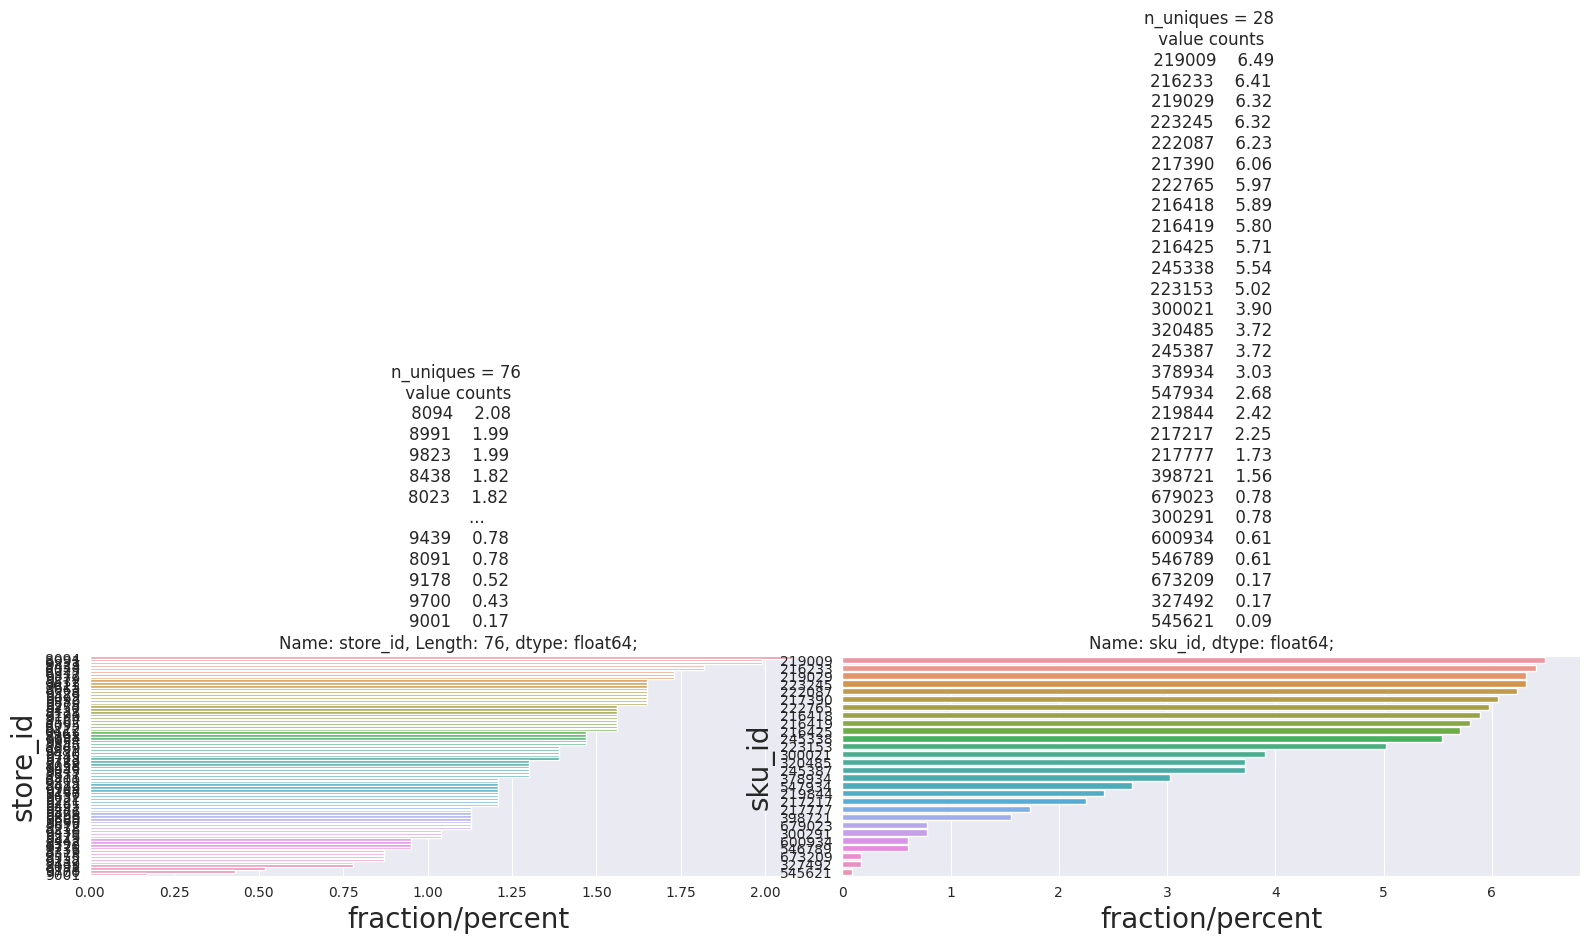

In [30]:
UVA_category(train, ['store_id','sku_id'])

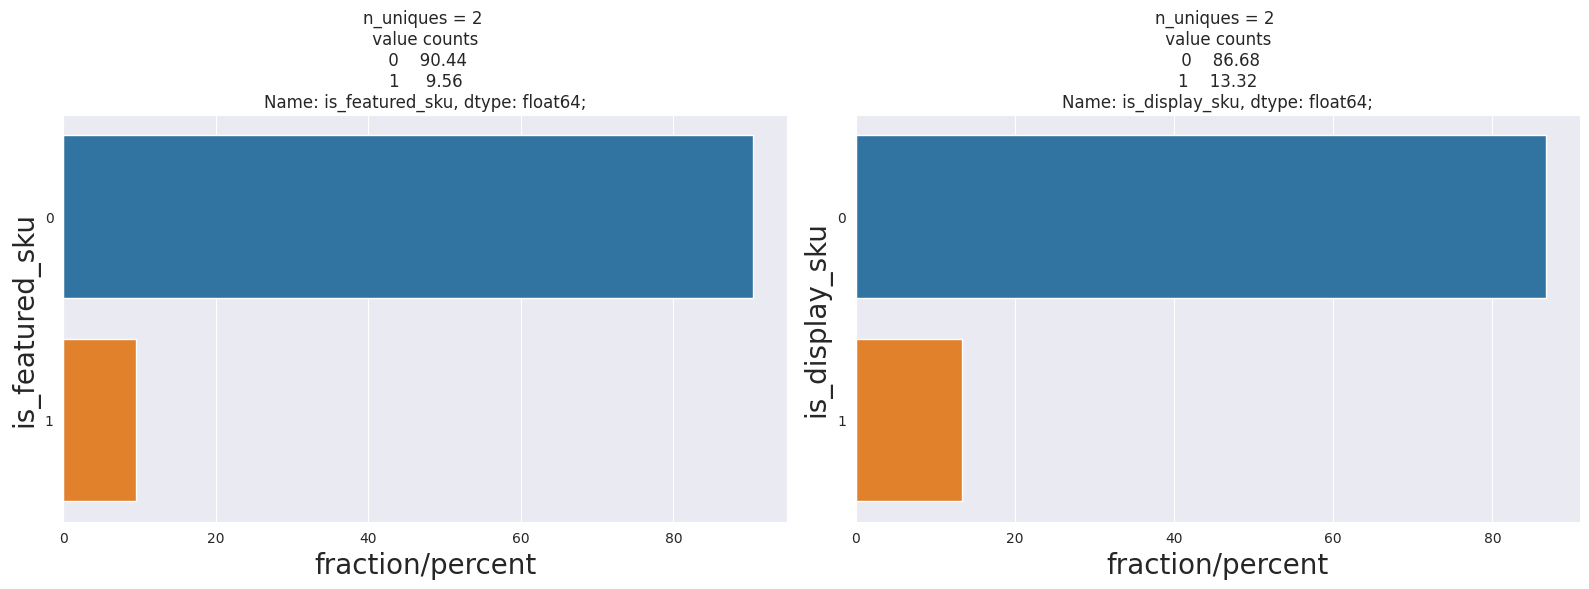

In [31]:
UVA_category(train,['is_featured_sku', 'is_display_sku'])

#### Correlation

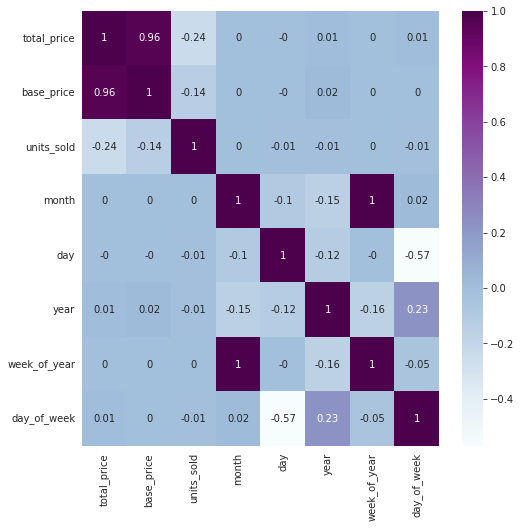

In [32]:
rounded = round(train.corr(method = 'pearson'),2)
plt.figure(figsize=(8,8))
ax = sns.heatmap(rounded, cmap='BuPu', annot=True)
plt.show()

### Imputing the missing value in train data

In [33]:
train['total_price']= train['total_price'].fillna(train['total_price'].median())

## Linear Regression

In [34]:
# converting back all the categorical variables into int64 for model making purpose
train['store_id'] = train['store_id'].astype('int64')
train['sku_id'] = train['sku_id'].astype('int64')
train['is_display_sku'] = train['is_display_sku'].astype('int64')
train['is_featured_sku'] = train['is_featured_sku'].astype('int64')

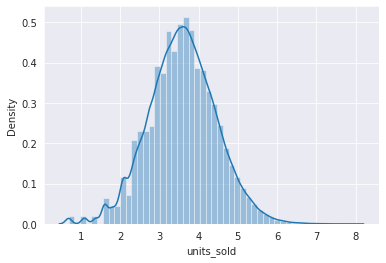

In [42]:
sns.distplot(train['units_sold'])

In [35]:
train['units_sold'] = np.log1p(train['units_sold'])
train['base_price'] = np.log(train['base_price'])

In [36]:
# Segregation of independent and dependent variables
x = train.drop(columns = ['units_sold'], axis=1)
y = train['units_sold']
x.shape , y.shape

((150150, 11), (150150,))

In [37]:
# splitting data into train set and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Implementing linear regression

In [38]:
# getting RMSLE values
model = LR()
model.fit(x_train,y_train)

pred = model.predict(x_train)
train_rmsle = np.sqrt(MSLE(y_train,pred))
pred_1= model.predict(x_test)
test_rmsle = np.sqrt(MSLE(y_test,pred_1))
print('TRAIN RMSLE VALUE',train_rmsle)
print('TEST RMSLE VALUE',test_rmsle)

TRAIN RMSLE VALUE 0.16719330899001877
TEST RMSLE VALUE 0.16659120049648077


In [39]:
# getting the predicted sales value 
prediction = model.predict(test)
prediction

array([ 72.52541052,  72.99479929,  89.42348444, ..., 266.83980735,
       126.45124064, 154.26107504])

In [40]:
# creating a new variable called prediction in test data
test['predicted_sales_value'] = prediction

In [41]:
test.head()

,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,day,year,week_of_year,day_of_week,predicted_sales_value
0,8091,216418,108.3000,108.3000,0,0,7,16,2013,29,1,72.525411
1,8091,216419,109.0125,109.0125,0,0,7,16,2013,29,1,72.994799
2,8091,216425,133.9500,133.9500,0,0,7,16,2013,29,1,89.423484
3,8091,216233,133.9500,133.9500,0,0,7,16,2013,29,1,89.424002
4,8091,217390,176.7000,176.7000,0,0,7,16,2013,29,1,117.584369
